<a href="https://colab.research.google.com/github/eecastillo/parkinson_analisis/blob/master/notebooks/Parkinson_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('./parkinson_dataset.csv')
df.head()

,ID,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break,class_information
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,3.223,0.996050,0.003967,24.204,186.266,186.300,0.859,184.502,187.880,183,182,0.005368,0.000025,0.0,0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194,193,0.004988,0.000020,0.0,0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,1.891,0.998021,0.001984,27.349,202.868,202.425,1.860,197.220,206.060,198,197,0.004940,0.000046,0.0,0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,1.667,0.999154,0.000847,32.114,204.027,204.090,0.931,202.324,206.182,200,199,0.004900,0.000023,0.0,0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,1.599,0.999295,0.000706,32.816,207.519,207.468,0.880,205.407,209.927,204,203,0.004820,0.000022,0.0,0,0.0,1


In [ ]:
#Separar el dataframe en variables dependientes e independientes
X = df.drop(columns=['class_information','ID'])
y = df['class_information']

In [ ]:
X.head()

,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break
0,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,3.223,0.996050,0.003967,24.204,186.266,186.300,0.859,184.502,187.880,183,182,0.005368,0.000025,0.0,0,0.0
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194,193,0.004988,0.000020,0.0,0,0.0
2,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,1.891,0.998021,0.001984,27.349,202.868,202.425,1.860,197.220,206.060,198,197,0.004940,0.000046,0.0,0,0.0
3,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,1.667,0.999154,0.000847,32.114,204.027,204.090,0.931,202.324,206.182,200,199,0.004900,0.000023,0.0,0,0.0
4,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,1.599,0.999295,0.000706,32.816,207.519,207.468,0.880,205.407,209.927,204,203,0.004820,0.000022,0.0,0,0.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class_information, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression(max_iter=10000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
logreg.score(X_test, y_test)

0.6391184573002755

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 78,  95],
       [ 31, 159]])

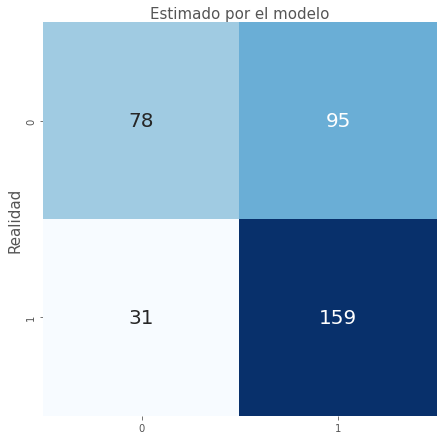

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.67819929, 0.32180071],
       [0.24375842, 0.75624158],
       [0.50809401, 0.49190599],
       [0.54606582, 0.45393418],
       [0.8478914 , 0.1521086 ],
       [0.35885427, 0.64114573],
       [0.77751748, 0.22248252],
       [0.69299217, 0.30700783],
       [0.3891974 , 0.6108026 ],
       [0.46893331, 0.53106669]])

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

NameError: ignored

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",(159 / (159 + 95)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",(159 / (159 + 31)))

Precision: 0.6259842519685039
Recall: 0.8368421052631579


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

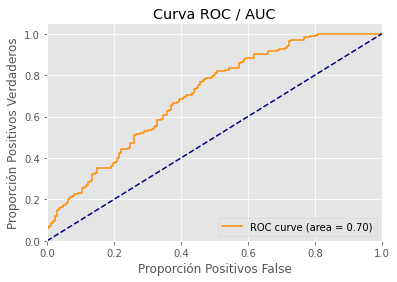

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()